# NLP Application with ML-Text Classification

### Importing Libraries

In [402]:
#!pip install nltk
#!pip install spacy -q
#!python -m spacy download en_core_web_sm -q
#!pip install matplotlib==3.4

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)

In [2]:
import re
import string
#nlp =spacy.load("en_core_web_sm")
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import *
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pcc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pcc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pcc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Loading Dataset and EDA

In [3]:
df = pd.read_excel("Core Test Data.xlsx")
df.head()

,DocumentId,EventInstanceId,#,News Date,Source,Country,Location (LatLng),Locations,Headline,Abstract,First Part,Body,URL,Event Category,1st Level Sub Category,2nd Level Sub Category,3rd Level Sub Category,Start Date,End Date,Actor List,Location Info,Level of Event,Type,Topic,Aim,Unnamed: 25,Unnamed: 26
0,AgreementsDocId1,AgreementsEventInstanceId1,1.0,2020-11-30 00:00:00,The Libya Observer,libya,NaN,"['Italy', 'Libya', 'Tripoli']",Al-Sarraj reviews with Eni officials support f...,The Head of the Libyan Presidential Council Fa...,The meeting was held in the presence of Eni CE...,NaN,https://www.libyaobserver.ly/inbrief/al-sarraj...,agreements,governmentPrivateActorAgreements,Energy agreements / meetings / visits,NaN,2020-11-30 00:00:00,NaN,"Al-Sarraj, Eni officials","Tripoli, Libya",Inter Governmental,Meeting,possible investments of the Italian company in...,NaN,NaN,NaN
1,AgreementsDocId2,AgreementsEventInstanceId2,2.0,2020-12-01 00:00:00,The Libya Observer,libya,"(32.806069013310236, 13.201975860087888)","['Italy', 'Libya']","NOC, Eni review resuming stalled projects",Chairman of the National Oil Corporation (NOC)...,The two parties also discussed the progress ma...,NaN,https://www.libyaobserver.ly/economy/noc-eni-r...,agreements,governmentPrivateActorAgreements,Energy agreements / meetings / visits,NaN,2020-12-01 00:00:00,NaN,"National Oil Corporation (NOC), Eni company","Tripoli, Libya",Inter Governmental,Meeting,the resumption of some significant projects th...,NaN,NaN,NaN
2,AgreementsDocId3,AgreementsEventInstanceId3,3.0,2020-11-19 00:00:00,Libya Herald,libya,NaN,"['Libya', 'Tripoli', 'Sirte']",Halliburton discusses increased cooperation wi...,"Halliburton Regional Director, Colby Fuser, me...",High accuracy leak detection systems in reserv...,"For his part, Colby Fuser said that he was ver...",https://www.libyaherald.com/2020/11/19/hallibu...,agreements,governmentPrivateActorAgreements,Energy agreements / meetings / visits,NaN,2020-11-18 00:00:00,NaN,"National Oil Corporation (NOC), Colby Fuser","Tripoli, Libya",Inter Governmental,Meeting,development of joint cooperation between the t...,NaN,NaN,NaN
3,AgreementsDocId4,AgreementsEventInstanceId4,4.0,2020-11-19 00:00:00,Bloomberg Business,libya,NaN,"['Libya', 'Sweden', 'France', 'Brega']",Libya Says Total Mulls More Investment in Nati...,Total discussed helping boost flows to highest...,Daily output has already recovered to 1.25 mil...,"""This explains the rapid return to previous pr...",https://www.bloomberg.com/news/articles/2020-1...,agreements,governmentPrivateActorAgreements,Energy agreements / meetings / visits,NaN,2020-11-18 00:00:00,NaN,"National Oil Corporation (NOC), Total, France",Virtual,Inter Governmental,Meeting,efforts to increase Libyan production capacity...,NaN,NaN,NaN
4,AgreementsDocId5,AgreementsEventInstanceId5,5.0,2020-11-18 00:00:00,Libya Herald,libya,NaN,"[""Ra's Lanuf"", 'Tripoli', 'Benghazi', 'Libya']",Zallaf and NOC discuss new South Refinery,A wide ranging face-to-face technical meeting ...,The NOC reported that during the meeting the t...,NaN,https://www.libyaherald.com/2020/11/18/zallaf-...,agreements,governmentPrivateActorAgreements,Energy agreements / meetings / visits,NaN,2020-11-17 00:00:00,NaN,"National Oil Corporation (NOC), Zallaf Libya Oil","Tripoli, Libya",Intra Governmental,Meeting,the technical and financial details of the pro...,NaN,NaN,NaN


In [4]:
df.shape

(489, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DocumentId              463 non-null    object 
 1   EventInstanceId         463 non-null    object 
 2   #                       463 non-null    float64
 3   News Date               461 non-null    object 
 4   Source                  461 non-null    object 
 5   Country                 462 non-null    object 
 6   Location (LatLng)       70 non-null     object 
 7   Locations               436 non-null    object 
 8   Headline                462 non-null    object 
 9   Abstract                458 non-null    object 
 10  First Part              449 non-null    object 
 11  Body                    268 non-null    object 
 12  URL                     440 non-null    object 
 13  Event Category          462 non-null    object 
 14  1st Level Sub Category  462 non-null    ob

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(487, 27)

In [7]:
df.isnull().sum()

DocumentId                 24
EventInstanceId            24
#                          24
News Date                  26
Source                     26
Country                    25
Location (LatLng)         417
Locations                  51
Headline                   25
Abstract                   29
First Part                 38
Body                      219
URL                        47
Event Category             25
1st Level Sub Category     25
2nd Level Sub Category    238
3rd Level Sub Category    384
Start Date                186
End Date                  370
Actor List                166
Location Info             205
Level of Event            256
Type                      286
Topic                     314
Aim                       349
Unnamed: 25               361
Unnamed: 26               464
dtype: int64

In [8]:
df["DocumentId"].value_counts()

AgreementsDocId1    1
EconomicDocId31     1
EconomicDocId29     1
EconomicDocId28     1
EconomicDocId27     1
                   ..
ConflictDocId126    1
ConflictDocId125    1
ConflictDocId124    1
ConflictDocId123    1
UprisingDocId10     1
Name: DocumentId, Length: 463, dtype: int64

In [9]:
df["EventInstanceId"].value_counts()

AgreementsEventInstanceId1    1
EconomicEventInstanceId31     1
EconomicEventInstanceId29     1
EconomicEventInstanceId28     1
EconomicEventInstanceId27     1
                             ..
ConflictEventInstanceId126    1
ConflictEventInstanceId125    1
ConflictEventInstanceId124    1
ConflictEventInstanceId123    1
UprisingEventInstanceId10     1
Name: EventInstanceId, Length: 463, dtype: int64

In [10]:
df["#"].value_counts()

1.0      9
4.0      9
5.0      9
6.0      9
7.0      9
        ..
103.0    1
104.0    1
106.0    1
107.0    1
134.0    1
Name: #, Length: 134, dtype: int64

In [11]:
df["News Date"].value_counts()

2020-05-19    11
2020-05-18    10
2020-05-21     8
2020-05-26     7
2020-05-06     7
              ..
2019-11-27     1
2020-06-01     1
2020-05-16     1
2020-04-20     1
2020-01-15     1
Name: News Date, Length: 224, dtype: int64

In [12]:
df["Source"].value_counts()

The Libya Observer           115
Reuters                       88
Libya Herald                  88
ANADOLU AJANSI                52
France 24                      8
???                            8
Al-Monitor                     7
Bloomberg Business             7
Libya Business Review          7
Sputnik                        7
The Guardian                   7
Ahram Online                   6
Xinhua                         5
Al Jazeera                     4
Ahval                          3
DW                             3
Arab News                      3
BBC                            2
Ansamed                        2
???? ???????                   2
S&P Global                     2
AA                             2
The Arab Weekly                2
The Wall Street Journal        2
Deutsche Welle                 2
RTT News                       1
France24                       1
Libya Observer                 1
Africa News                    1
Middle East Eye                1
Financial 

In [13]:
df["Country"].value_counts()

libya    423
Libya     39
Name: Country, dtype: int64

In [14]:
df["Location (LatLng)"].value_counts()

(32.0668698032027, 20.327573584277467)      2
(32.46243057481838, 11.768126121704116)     2
(32.75271750246225, 13.241055017996132)     2
(27.04625257472525, 16.87964281237999)      1
(27.375178543039784, 17.567448250000016)    1
                                           ..
(32.471554918179756, 11.764864555542006)    1
(32.02031445454207, 20.134348906962888)     1
(32.879724263416406, 13.263360219030961)    1
(26.264008667335652, 17.48211021903096)     1
(32.09239053760992, 20.112376250712888)     1
Name: Location (LatLng), Length: 67, dtype: int64

In [15]:
df["Location (LatLng)"].head()

0                                         NaN
1    (32.806069013310236, 13.201975860087888)
2                                         NaN
3                                         NaN
4                                         NaN
Name: Location (LatLng), dtype: object

In [16]:
df["Locations"].value_counts()

['Libya']                                                                               43
['Tripoli', 'Libya']                                                                    24
['Libya', 'Tripoli']                                                                    15
Tripoli                                                                                  9
[]                                                                                       5
                                                                                        ..
['Tarhuna', 'Tripoli', 'Libya', 'Russia', 'France', 'Egypt', 'United Arab Emirates']     1
['Sudan', 'Tripoli', 'Libya']                                                            1
['United Arab Emirates', 'Tripoli', 'Libya', 'Tarhuna']                                  1
['Sirte', 'Tarhuna', 'United Arab Emirates', 'Tripoli', 'Libya']                         1
['Marj', 'Benghazi']                                                                     1

In [17]:
df["Start Date"].value_counts()

Start Date             25
2020-01-01 00:00:00     6
2020-12-16 00:00:00     6
2020-11-19 00:00:00     5
2020-11-16 00:00:00     5
                       ..
2020-04-25 00:00:00     1
2020-02-03 00:00:00     1
2020-01-13 00:00:00     1
2020-06-04 00:00:00     1
2020-09-14 00:00:00     1
Name: Start Date, Length: 173, dtype: int64

In [18]:
df["Actor List"].value_counts()

ISIS                                                                                 17
Actor List                                                                            9
Perpetrator                                                                           8
GNA                                                                                   6
Libya                                                                                 6
                                                                                     ..
GNA, Main economic stakeholders in Libya                                              1
UN, Libya Rivals                                                                      1
UNSMIL, USA, EU, Egypt, GNA                                                           1
The Deputy Chairman of the Presidential Council (PC), Spanish Ambassador to Libya     1
Eastern Libya demonstrators                                                           1
Name: Actor List, Length: 242, d

In [19]:
df["Type"].value_counts()

Energy                                                                                                                                                                                  30
Meeting                                                                                                                                                                                 21
Economy                                                                                                                                                                                 16
10                                                                                                                                                                                       6
Wounded                                                                                                                                                                                  5
                                                                 

In [20]:
df["Aim"].value_counts()

bomb            8
car bomb        6
Weapon Type     4
Not happened    3
Gun             3
               ..
1153            1
1196            1
Total Death     1
47              1
2               1
Name: Aim, Length: 112, dtype: int64

In [21]:
df["Unnamed: 26"].value_counts()

Location Info                                4
Tripoli                                      3
Tripoli                                      2
Malta International Airport                  2
Sirte                                        1
Sabha - Tindi Camp                           1
Southern part of Tripoli                     1
El Feel                                      1
Tripoli, Al-Hadhba                           1
Tarhuna                                      1
Al-Watyah, Al Watiya Airbase                 1
east of Misrata                              1
Tarhuna, about 65km southeast of Tripoli     1
southern Tripoli                             1
Diverted Destination                         1
Benghazi                                     1
Name: Unnamed: 26, dtype: int64

In [22]:
df["Event Category"].value_counts()

conflicts                 133
diplomatic                 77
economicEvents             54
naturalDisasters           49
terror                     39
societalChallenges         36
politicalEvents            33
agreements                 25
uprising                   10
technologicalDisasters      6
Name: Event Category, dtype: int64

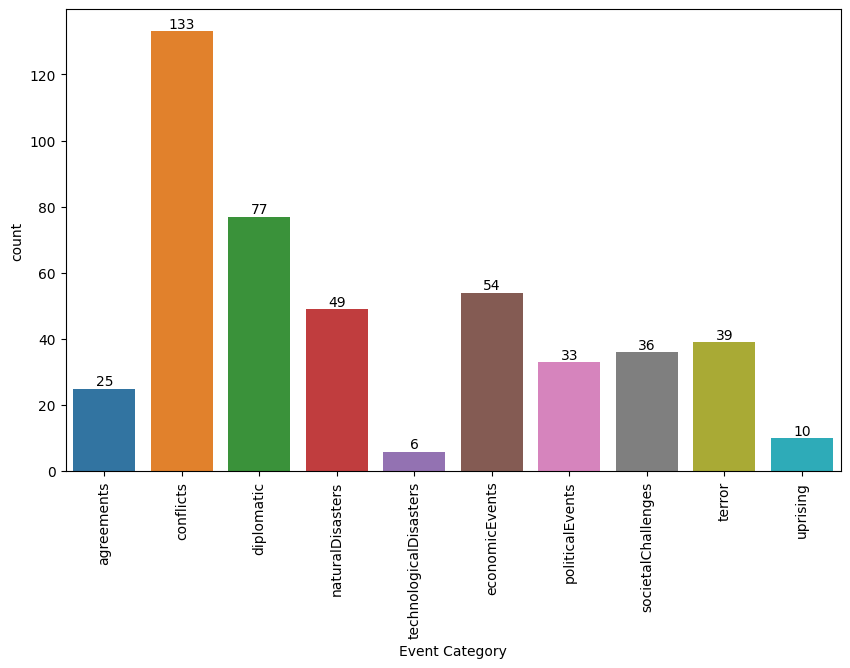

In [24]:
ax = sns.countplot(data = df, x ="Event Category")
for p in ax.containers:
    ax.bar_label(p)
    ax.tick_params(axis="x", rotation=90)

# Feature Selection, Features and Labels for Text Classification Models

### PoliticalEvent Domain for Text Classification

In [25]:
df2 = df[df["Event Category"] == "politicalEvents"][["Headline","Abstract","First Part","Body","Event Category","1st Level Sub Category","2nd Level Sub Category","3rd Level Sub Category"]]

In [26]:
df2.fillna('', inplace=True)

In [27]:
df2["Input"]=df2["Headline"].map(str) +" "+ df2["Abstract"].map(str) +" "+ df2["First Part"].map(str) +" " + df2["Body"].map(str)

In [28]:
df2["Input"].iloc[0]

"Former TV repairman Naker announces his candidacy for Libya's prime The Leader of the 'Summit Party', Abdullah Naker, announced his intention to run for the position of prime minister of the next Libyan government. Naker, a TV repairman-turned-millionaire after 2011, called on the Libyan people to recognize the competence and his ability to lead this sensitive period in Libya's history. Regarding methods of communication with his Summit Party, he attached, what he described as an available telephone number, along with a valid email address for convenience. "

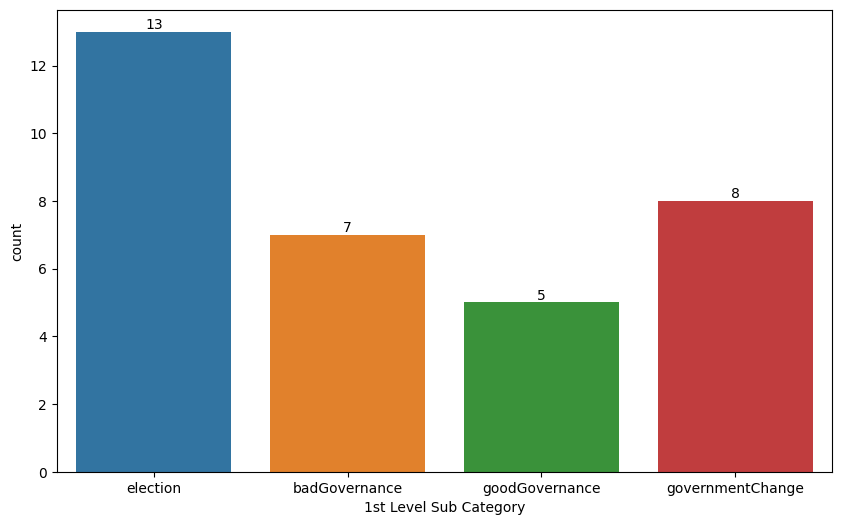

In [29]:
ax = sns.countplot(data = df2, x ="1st Level Sub Category")
for p in ax.containers:
    ax.bar_label(p)

## Cleaning Data

In [30]:
df2["Input"].head()

360    Former TV repairman Naker announces his candid...
361    Libya to hold national elections in December 2...
362    Libya to hold elections in December 2021 The A...
363    Libyans to hold national elections in December...
364    Libya to hold elections on 24 December 2021 Pa...
Name: Input, dtype: object

In [ ]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

In [32]:
stop_words = stopwords.words('english')

In [33]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [34]:
cleaning_text = df2["Input"].apply(cleaning)
cleaning_text.head()

360    former tv repairman naker announces candidacy ...
361    libya hold national election december un missi...
362    libya hold election december acting head un mi...
363    libyan hold national election december body gr...
364    libya hold election december participant libya...
Name: Input, dtype: object

In [35]:
df2["Input"]=df2["Input"].apply(cleaning)

In [37]:
df2["Input"].sample(1)

392    new libya interim government agreed talk spons...
Name: Input, dtype: object

In [38]:
worldcloud = WordCloud(background_color="white", max_words =200)

In [39]:
all_words = " ".join(df2.Input)

In [40]:
all_words[:100]

'former tv repairman naker announces candidacy libya prime leader summit party abdullah naker announc'

In [41]:
worldcloud.generate(all_words)

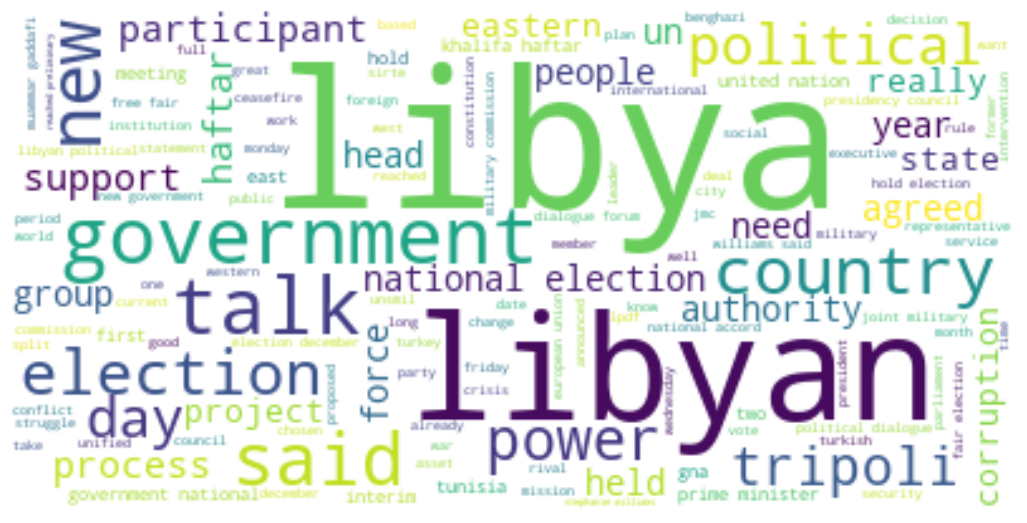

In [42]:
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Features and Labels

In [45]:
df2 = df2[["Input","1st Level Sub Category", "2nd Level Sub Category","3rd Level Sub Category"]]
df2.sample(3)

,Input,1st Level Sub Category,2nd Level Sub Category,3rd Level Sub Category
377,supporting democratic transition fair election...,goodGovernance,,
391,libya national army commander haftar accepts p...,governmentChange,,
386,new libya interim government agreed un talk mo...,governmentChange,,


## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df2["Input"]
y= df2["1st Level Sub Category"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=101)

## Vectorization

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,2), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [54]:
vectorizer.get_feature_names_out()

array(['accord', 'achieve', 'across', 'acting', 'added', 'administration',
       'african', 'agreed', 'agreement', 'aimed', 'already', 'also',
       'announced', 'arab', 'army', 'asset', 'authority', 'backed',
       'based', 'bashagha', 'body', 'called', 'came', 'candidate',
       'capital', 'central', 'change', 'chaos', 'chosen', 'city', 'civil',
       'commander', 'commission', 'conference', 'conflict',
       'constitution', 'control', 'council', 'country', 'current', 'date',
       'day', 'december', 'decision', 'delegate', 'dialogue', 'divided',
       'division', 'east', 'eastern', 'economic', 'egypt', 'elected',
       'election', 'emirate', 'end', 'ended', 'european', 'existing',
       'face', 'faction', 'fair', 'fathi', 'first', 'focus', 'force',
       'former', 'forum', 'free', 'friday', 'gaddafi', 'general', 'gna',
       'government', 'ground', 'group', 'haftar', 'head', 'held', 'high',
       'history', 'hold', 'holding', 'house', 'however', 'inclusive',
       'ins

In [55]:
X_train_count.toarray()

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 3, 2],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [56]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,accord,achieve,across,acting,added,administration,african,agreed,agreement,aimed,already,also,announced,arab,army,asset,authority,backed,based,bashagha,body,called,came,candidate,capital,...,told,transition,transitional,tripoli,tunis,tunisia,turkey,two,un,union,united,unity,vote,war,warring,week,well,western,williams,within,without,work,world,would,year
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0
1,1,1,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,2,0,1,0,0,0,0,...,1,0,1,2,1,3,0,0,1,0,1,0,1,0,0,0,1,0,2,0,0,0,0,3,2
3,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,3,0,1
7,0,0,0,0,1,0,0,0,0,1,1,4,1,0,0,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6,2,0,0,0,0,0,1,0,0,0,0,2,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1


## Model Comparisons - Vectorization

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [58]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    

## Naive Bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [68]:
nb = MultinomialNB(alpha=6) # alpha smoothness parameter overfitting used as Grid search 
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=6)

In [69]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1 1 0 0]
 [0 4 0 0]
 [0 0 0 1]
 [0 0 0 2]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      0.50      0.67         2
        election       0.80      1.00      0.89         4
  goodGovernance       0.00      0.00      0.00         1
governmentChange       0.67      1.00      0.80         2

        accuracy                           0.78         9
       macro avg       0.62      0.62      0.59         9
    weighted avg       0.73      0.78      0.72         9

Train_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      0.80      0.89         5
        election       0.75      1.00      0.86         9
  goodGovernance       1.00      0.50      0.67         4
governmentChange       1.00      1.00      1.00         6

        accuracy                           0.88        24
       macro avg       0.94      0.82      0.85        24
    weighted avg       0.91      0.88      0.87     

In [71]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average="macro", labels=['badGovernance', 'election', 'goodGovernance', 'governmentChange']),
            'recall': make_scorer(recall_score, average="macro", labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange']),
            'f1': make_scorer(f1_score, average="macro", labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'])}

model = MultinomialNB(alpha=3)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.590000
test_precision    0.316667
test_recall       0.475000
test_f1           0.368333
dtype: float64

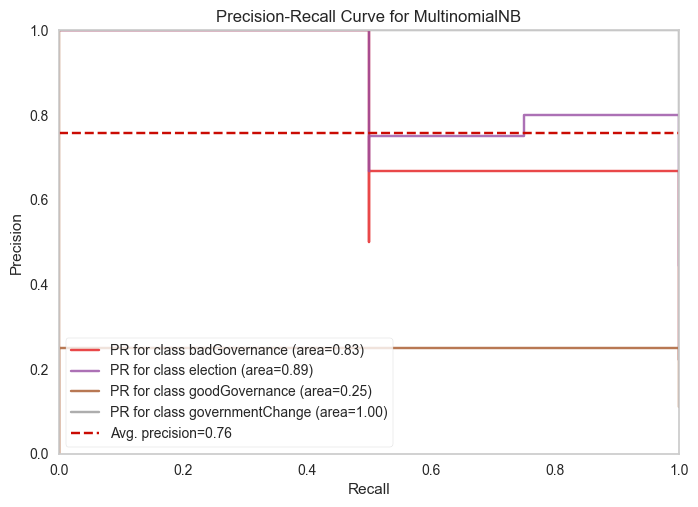

In [72]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=3),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [73]:
nb.classes_

array(['badGovernance', 'election', 'goodGovernance', 'governmentChange'],
      dtype='<U16')

In [74]:
y_pred = nb.predict(X_test_count)
nb_count_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
nb_count_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
nb_AP = viz.score_["micro"]

## Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.003,solver="saga", max_iter=100, class_weight='balanced') #Cfloat, default=1.0 Inverse of regularization strength;smaller values specify stronger regularization.
log.fit(X_train_count,y_train)

LogisticRegression(C=0.003, class_weight='balanced', solver='saga')

In [93]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1 1 0 0]
 [1 3 0 0]
 [0 0 0 1]
 [0 0 0 2]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.50      0.50      0.50         2
        election       0.75      0.75      0.75         4
  goodGovernance       0.00      0.00      0.00         1
governmentChange       0.67      1.00      0.80         2

        accuracy                           0.67         9
       macro avg       0.48      0.56      0.51         9
    weighted avg       0.59      0.67      0.62         9

Train_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      1.00      1.00         5
        election       1.00      0.89      0.94         9
  goodGovernance       1.00      1.00      1.00         4
governmentChange       0.86      1.00      0.92         6

        accuracy                           0.96        24
       macro avg       0.96      0.97      0.97        24
    weighted avg       0.96      0.96      0.96    

In [98]:
model = LogisticRegression(C = 0.003, max_iter=100, class_weight="balanced") # min error max iter\ c for overfitting 1 to zero
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.550000
test_precision    0.358333
test_recall       0.450000
test_f1           0.383333
dtype: float64

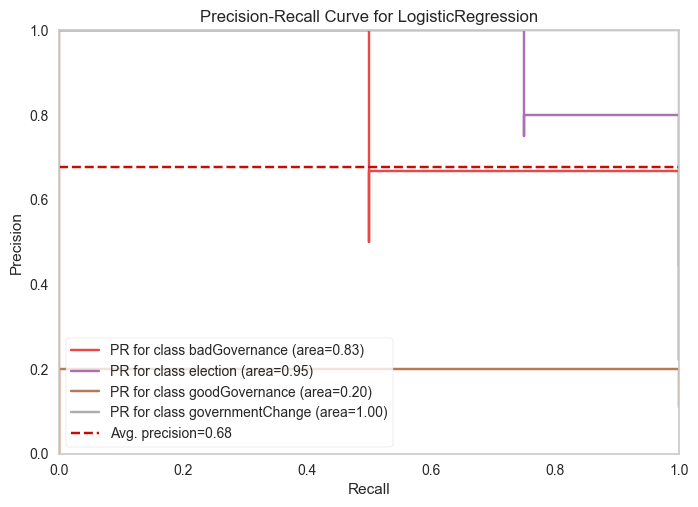

In [99]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.003, max_iter=100),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [100]:
y_pred = log.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
log_count_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
log_AP = viz.score_["micro"]

## SVM

In [113]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001, class_weight="balanced") # c for overfitting
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced')

In [112]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[0 2 0 0]
 [0 4 0 0]
 [0 0 0 1]
 [0 0 0 2]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         2
        election       0.67      1.00      0.80         4
  goodGovernance       0.00      0.00      0.00         1
governmentChange       0.67      1.00      0.80         2

        accuracy                           0.67         9
       macro avg       0.33      0.50      0.40         9
    weighted avg       0.44      0.67      0.53         9

Train_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         5
        election       0.67      0.89      0.76         9
  goodGovernance       1.00      0.25      0.40         4
governmentChange       0.55      1.00      0.71         6

        accuracy                           0.62        24
       macro avg       0.55      0.53      0.47        24
    weighted avg       0.55      0.62      0.53    

In [114]:
model = LinearSVC(C=0.001, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.590000
test_precision    0.308333
test_recall       0.475000
test_f1           0.366667
dtype: float64

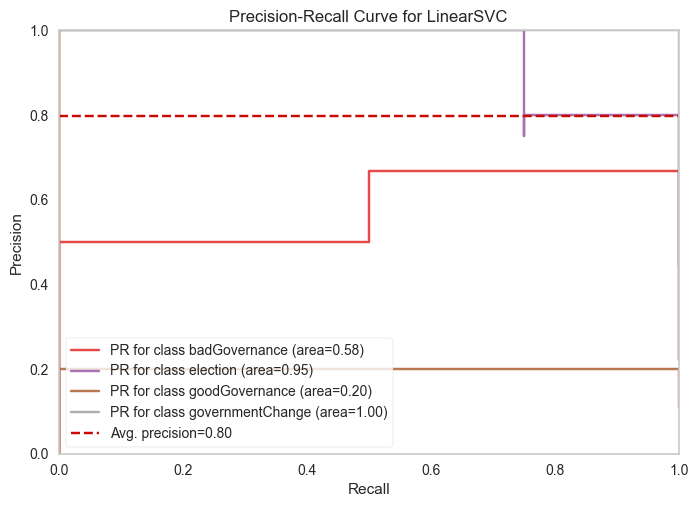

In [115]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced"),
    classes=svc.classes_,
    per_class=True,
    pos_label={'badGovernance', 'election', 'goodGovernance', 'governmentChange'},
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [116]:
y_pred = svc.predict(X_test_count)
svc_count_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
svc_count_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
svc_AP = viz.score_["micro"]

## KNN

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=7)

In [144]:
print("KNN MODEL")
eval(knn, X_train_count, X_test_count)

KNN MODEL
[[1 1 0 0]
 [1 3 0 0]
 [1 0 0 0]
 [2 0 0 0]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.20      0.50      0.29         2
        election       0.75      0.75      0.75         4
  goodGovernance       0.00      0.00      0.00         1
governmentChange       0.00      0.00      0.00         2

        accuracy                           0.44         9
       macro avg       0.24      0.31      0.26         9
    weighted avg       0.38      0.44      0.40         9

Train_Set
                  precision    recall  f1-score   support

   badGovernance       0.30      0.60      0.40         5
        election       0.54      0.78      0.64         9
  goodGovernance       0.00      0.00      0.00         4
governmentChange       1.00      0.17      0.29         6

        accuracy                           0.46        24
       macro avg       0.46      0.39      0.33        24
    weighted avg       0.51      0.46      0.39    

In [147]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.5100
test_precision    0.3375
test_recall       0.4250
test_f1           0.3450
dtype: float64

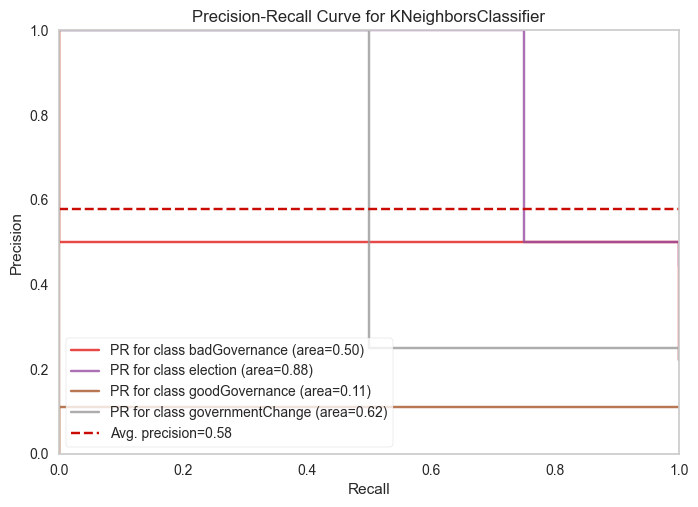

In [148]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=7),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [149]:
y_pred = knn.predict(X_test_count)
knn_count_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
knn_count_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
knn_AP = viz.score_["micro"]

## Random Forest

In [173]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(1000, max_depth = 5, random_state = 42, n_jobs = -1, class_weight="balanced") # 
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=1000,
                       n_jobs=-1, random_state=42)

In [174]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1 1 0 0]
 [0 4 0 0]
 [0 1 0 0]
 [0 0 0 2]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      0.50      0.67         2
        election       0.67      1.00      0.80         4
  goodGovernance       0.00      0.00      0.00         1
governmentChange       1.00      1.00      1.00         2

        accuracy                           0.78         9
       macro avg       0.67      0.62      0.62         9
    weighted avg       0.74      0.78      0.73         9

Train_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      1.00      1.00         5
        election       1.00      1.00      1.00         9
  goodGovernance       1.00      1.00      1.00         4
governmentChange       1.00      1.00      1.00         6

        accuracy                           1.00        24
       macro avg       1.00      1.00      1.00        24
    weighted avg       1.00      1.00      1.00     

In [176]:
model = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1,class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.380000
test_precision    0.133333
test_recall       0.250000
test_f1           0.170000
dtype: float64

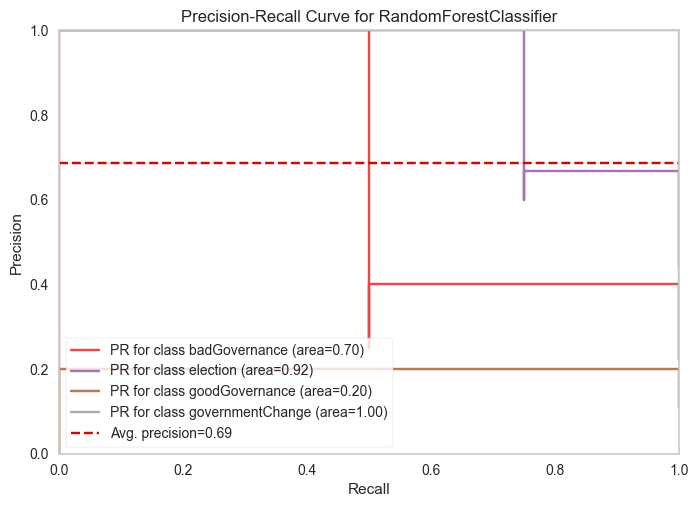

In [177]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1,class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [178]:
y_pred = rf.predict(X_test_count)
rf_count_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
rf_count_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
rf_AP = viz.score_["micro"]

## Ada Boost

In [189]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 50, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(random_state=42)

In [190]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[0 2 0 0]
 [0 3 0 1]
 [0 1 0 0]
 [0 0 0 2]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         2
        election       0.50      0.75      0.60         4
  goodGovernance       0.00      0.00      0.00         1
governmentChange       0.67      1.00      0.80         2

        accuracy                           0.56         9
       macro avg       0.29      0.44      0.35         9
    weighted avg       0.37      0.56      0.44         9

Train_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         5
        election       0.50      1.00      0.67         9
  goodGovernance       0.00      0.00      0.00         4
governmentChange       1.00      1.00      1.00         6

        accuracy                           0.62        24
       macro avg       0.38      0.50      0.42        24
    weighted avg       0.44      0.62      0.50    

In [199]:
model = AdaBoostClassifier(n_estimators= 50)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.260000
test_precision    0.129167
test_recall       0.200000
test_f1           0.138333
dtype: float64

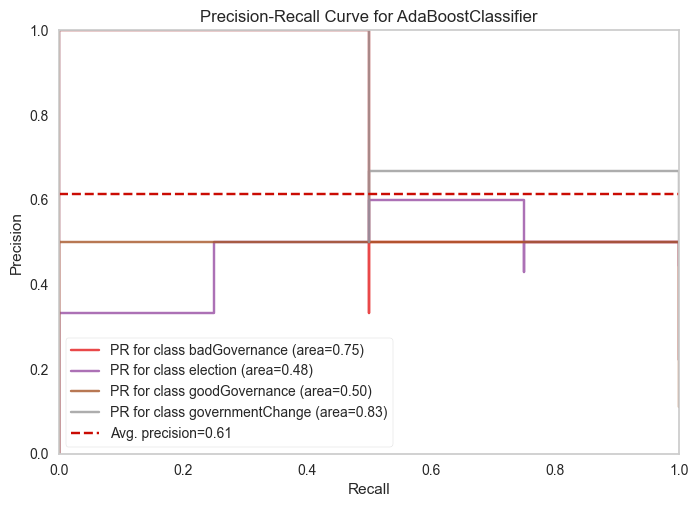

In [200]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 50, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [201]:
y_pred = ada.predict(X_test_count)
ada_count_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
ada_count_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
ada_AP = viz.score_["micro"]

## TF-IDF

In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [203]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [204]:
X_train_tf_idf.toarray()

array([[0.09826794, 0.        , 0.        , ..., 0.        , 0.09140196,
        0.        ],
       [0.14172587, 0.15384542, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07506666, 0.        , 0.07506666, ..., 0.        , 0.20946525,
        0.09976346],
       ...,
       [0.        , 0.        , 0.        , ..., 0.1561641 , 0.13381025,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.11893276,
        0.08496739]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

## Model Comparisons  TF-IDF

## Naive Bayes

In [221]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB(alpha=2)
nb.fit(X_train_tf_idf,y_train)

MultinomialNB(alpha=2)

In [222]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[0 2 0 0]
 [0 4 0 0]
 [0 1 0 0]
 [0 2 0 0]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         2
        election       0.44      1.00      0.62         4
  goodGovernance       0.00      0.00      0.00         1
governmentChange       0.00      0.00      0.00         2

        accuracy                           0.44         9
       macro avg       0.11      0.25      0.15         9
    weighted avg       0.20      0.44      0.27         9

Train_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      0.20      0.33         5
        election       0.53      1.00      0.69         9
  goodGovernance       0.00      0.00      0.00         4
governmentChange       1.00      1.00      1.00         6

        accuracy                           0.67        24
       macro avg       0.63      0.55      0.51        24
    weighted avg       0.66      0.67      0.58     

In [224]:
model = MultinomialNB(alpha=2)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.460000
test_precision    0.205000
test_recall       0.350000
test_f1           0.245238
dtype: float64

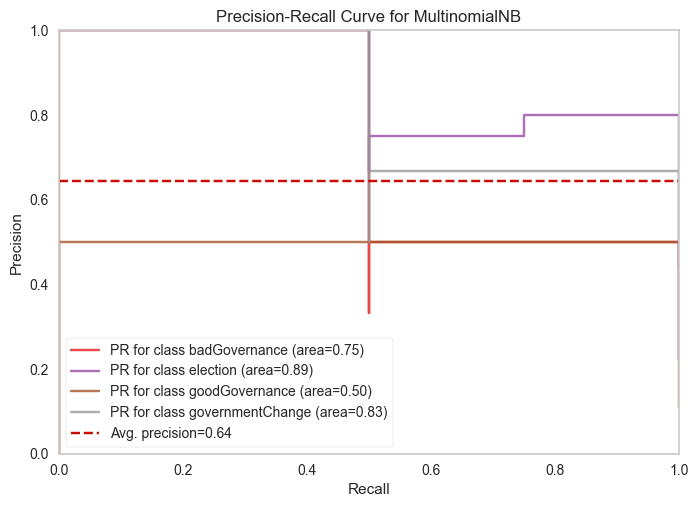

In [225]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=2),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [226]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
nb_tfidf_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
nb_tfidf_AP = viz.score_["micro"]

## Logistic Regression

In [267]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.02, solver="saga", max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000,
                   solver='saga')

In [268]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1 0 1 0]
 [1 1 2 0]
 [0 0 1 0]
 [0 0 2 0]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.50      0.50      0.50         2
        election       1.00      0.25      0.40         4
  goodGovernance       0.17      1.00      0.29         1
governmentChange       0.00      0.00      0.00         2

        accuracy                           0.33         9
       macro avg       0.42      0.44      0.30         9
    weighted avg       0.57      0.33      0.32         9

Train_Set
                  precision    recall  f1-score   support

   badGovernance       0.71      1.00      0.83         5
        election       1.00      0.89      0.94         9
  goodGovernance       0.50      1.00      0.67         4
governmentChange       1.00      0.17      0.29         6

        accuracy                           0.75        24
       macro avg       0.80      0.76      0.68        24
    weighted avg       0.86      0.75      0.71    

In [269]:
model = LogisticRegression(C=0.02, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.380000
test_precision    0.095000
test_recall       0.250000
test_f1           0.135714
dtype: float64

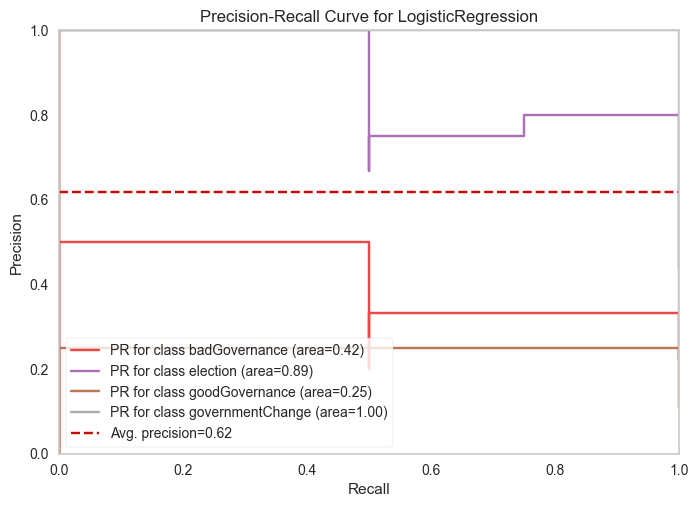

In [271]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.02, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [239]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
log_tfidf_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
log_tfidf_AP = viz.score_["micro"]

## SVM

In [275]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.05, class_weight="balanced")
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.05, class_weight='balanced')

In [276]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[0 1 0 1]
 [0 4 0 0]
 [0 0 0 1]
 [0 0 0 2]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         2
        election       0.80      1.00      0.89         4
  goodGovernance       0.00      0.00      0.00         1
governmentChange       0.50      1.00      0.67         2

        accuracy                           0.67         9
       macro avg       0.33      0.50      0.39         9
    weighted avg       0.47      0.67      0.54         9

Train_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      0.80      0.89         5
        election       0.82      1.00      0.90         9
  goodGovernance       1.00      0.75      0.86         4
governmentChange       1.00      1.00      1.00         6

        accuracy                           0.92        24
       macro avg       0.95      0.89      0.91        24
    weighted avg       0.93      0.92      0.92    

In [277]:
model = LinearSVC(C=0.05)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.460000
test_precision    0.205000
test_recall       0.350000
test_f1           0.245238
dtype: float64

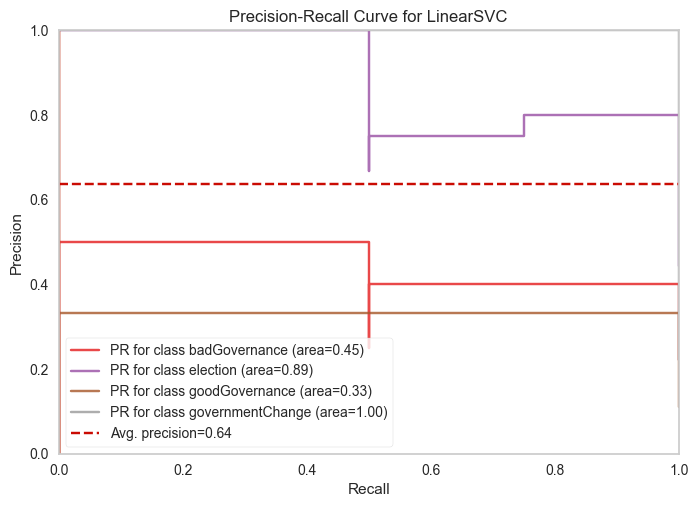

In [278]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.05),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [279]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
svc_tfidf_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
svc_tfidf_AP = viz.score_["micro"]

## KNN

In [281]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_tf_idf,y_train)

KNeighborsClassifier(n_neighbors=6)

In [282]:
print("KNN MODEL")
eval(knn, X_train_tf_idf, X_test_tf_idf)

KNN MODEL
[[0 1 0 1]
 [2 2 0 0]
 [0 0 0 1]
 [0 0 0 2]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         2
        election       0.67      0.50      0.57         4
  goodGovernance       0.00      0.00      0.00         1
governmentChange       0.50      1.00      0.67         2

        accuracy                           0.44         9
       macro avg       0.29      0.38      0.31         9
    weighted avg       0.41      0.44      0.40         9

Train_Set
                  precision    recall  f1-score   support

   badGovernance       0.50      0.40      0.44         5
        election       0.73      0.89      0.80         9
  goodGovernance       0.00      0.00      0.00         4
governmentChange       0.56      0.83      0.67         6

        accuracy                           0.62        24
       macro avg       0.45      0.53      0.48        24
    weighted avg       0.52      0.62      0.56    

In [283]:
model = KNeighborsClassifier(n_neighbors=6)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.630000
test_precision    0.366667
test_recall       0.525000
test_f1           0.423333
dtype: float64

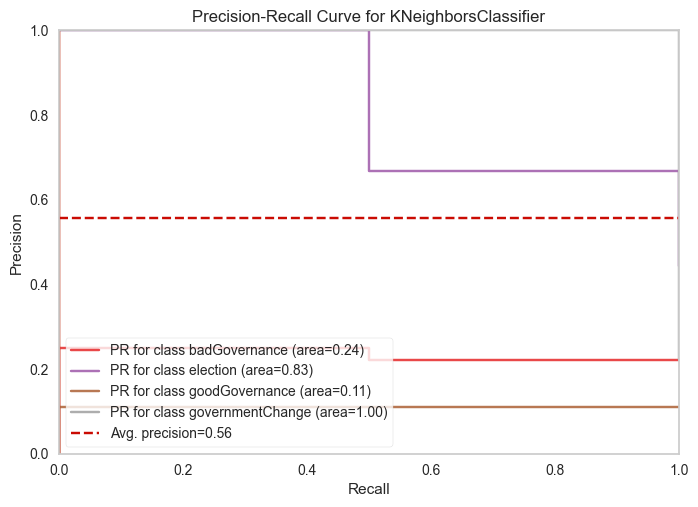

In [284]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=6),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [285]:
y_pred = knn.predict(X_test_tf_idf)
knn_tfidf_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
knn_tfidf_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
knn_tfidf_AP = viz.score_["micro"]

## RandomForest

In [288]:
rf = RandomForestClassifier(1000, max_depth = 5, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=1000,
                       n_jobs=-1, random_state=42)

In [287]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[0 2 0 0]
 [0 4 0 0]
 [0 1 0 0]
 [0 1 0 1]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         2
        election       0.50      1.00      0.67         4
  goodGovernance       0.00      0.00      0.00         1
governmentChange       1.00      0.50      0.67         2

        accuracy                           0.56         9
       macro avg       0.38      0.38      0.33         9
    weighted avg       0.44      0.56      0.44         9

Train_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      1.00      1.00         5
        election       1.00      1.00      1.00         9
  goodGovernance       1.00      1.00      1.00         4
governmentChange       1.00      1.00      1.00         6

        accuracy                           1.00        24
       macro avg       1.00      1.00      1.00        24
    weighted avg       1.00      1.00      1.00     

In [289]:
model = RandomForestClassifier(100, max_depth=5, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.460000
test_precision    0.191667
test_recall       0.325000
test_f1           0.233333
dtype: float64

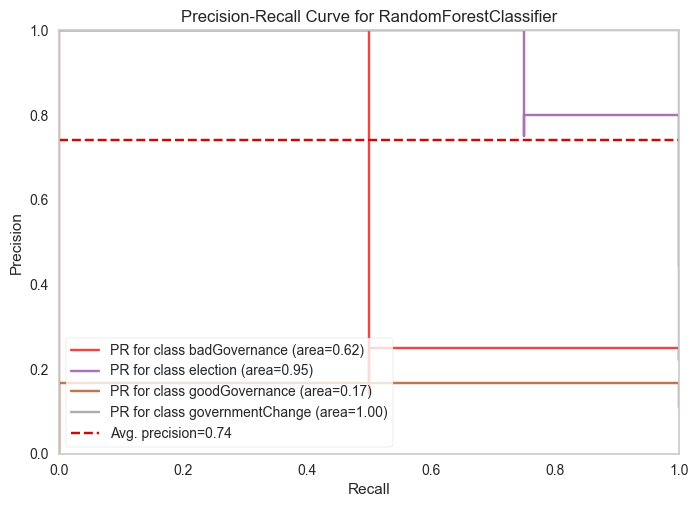

In [290]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=5, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [300]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
rf_tfidf_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
rf_tfidf_AP = viz.score_["micro"]

## Ada Boost

In [291]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 50, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(random_state=42)

In [292]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[0 2 0 0]
 [0 4 0 0]
 [0 1 0 0]
 [0 2 0 0]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         2
        election       0.44      1.00      0.62         4
  goodGovernance       0.00      0.00      0.00         1
governmentChange       0.00      0.00      0.00         2

        accuracy                           0.44         9
       macro avg       0.11      0.25      0.15         9
    weighted avg       0.20      0.44      0.27         9

Train_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      1.00      1.00         5
        election       0.47      1.00      0.64         9
  goodGovernance       0.00      0.00      0.00         4
governmentChange       0.00      0.00      0.00         6

        accuracy                           0.58        24
       macro avg       0.37      0.50      0.41        24
    weighted avg       0.39      0.58      0.45    

In [293]:
model = AdaBoostClassifier(n_estimators= 50, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.380000
test_precision    0.125000
test_recall       0.275000
test_f1           0.167143
dtype: float64

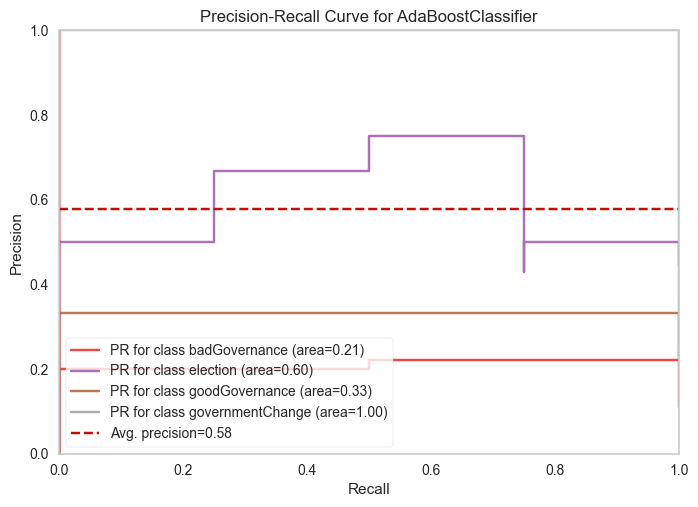

In [294]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 50, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [295]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
ada_tfidf_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
ada_tfidf_AP = viz.score_["micro"]

In [296]:
viz.score_["micro"]

0.5778262196740458

## Compare Scoring

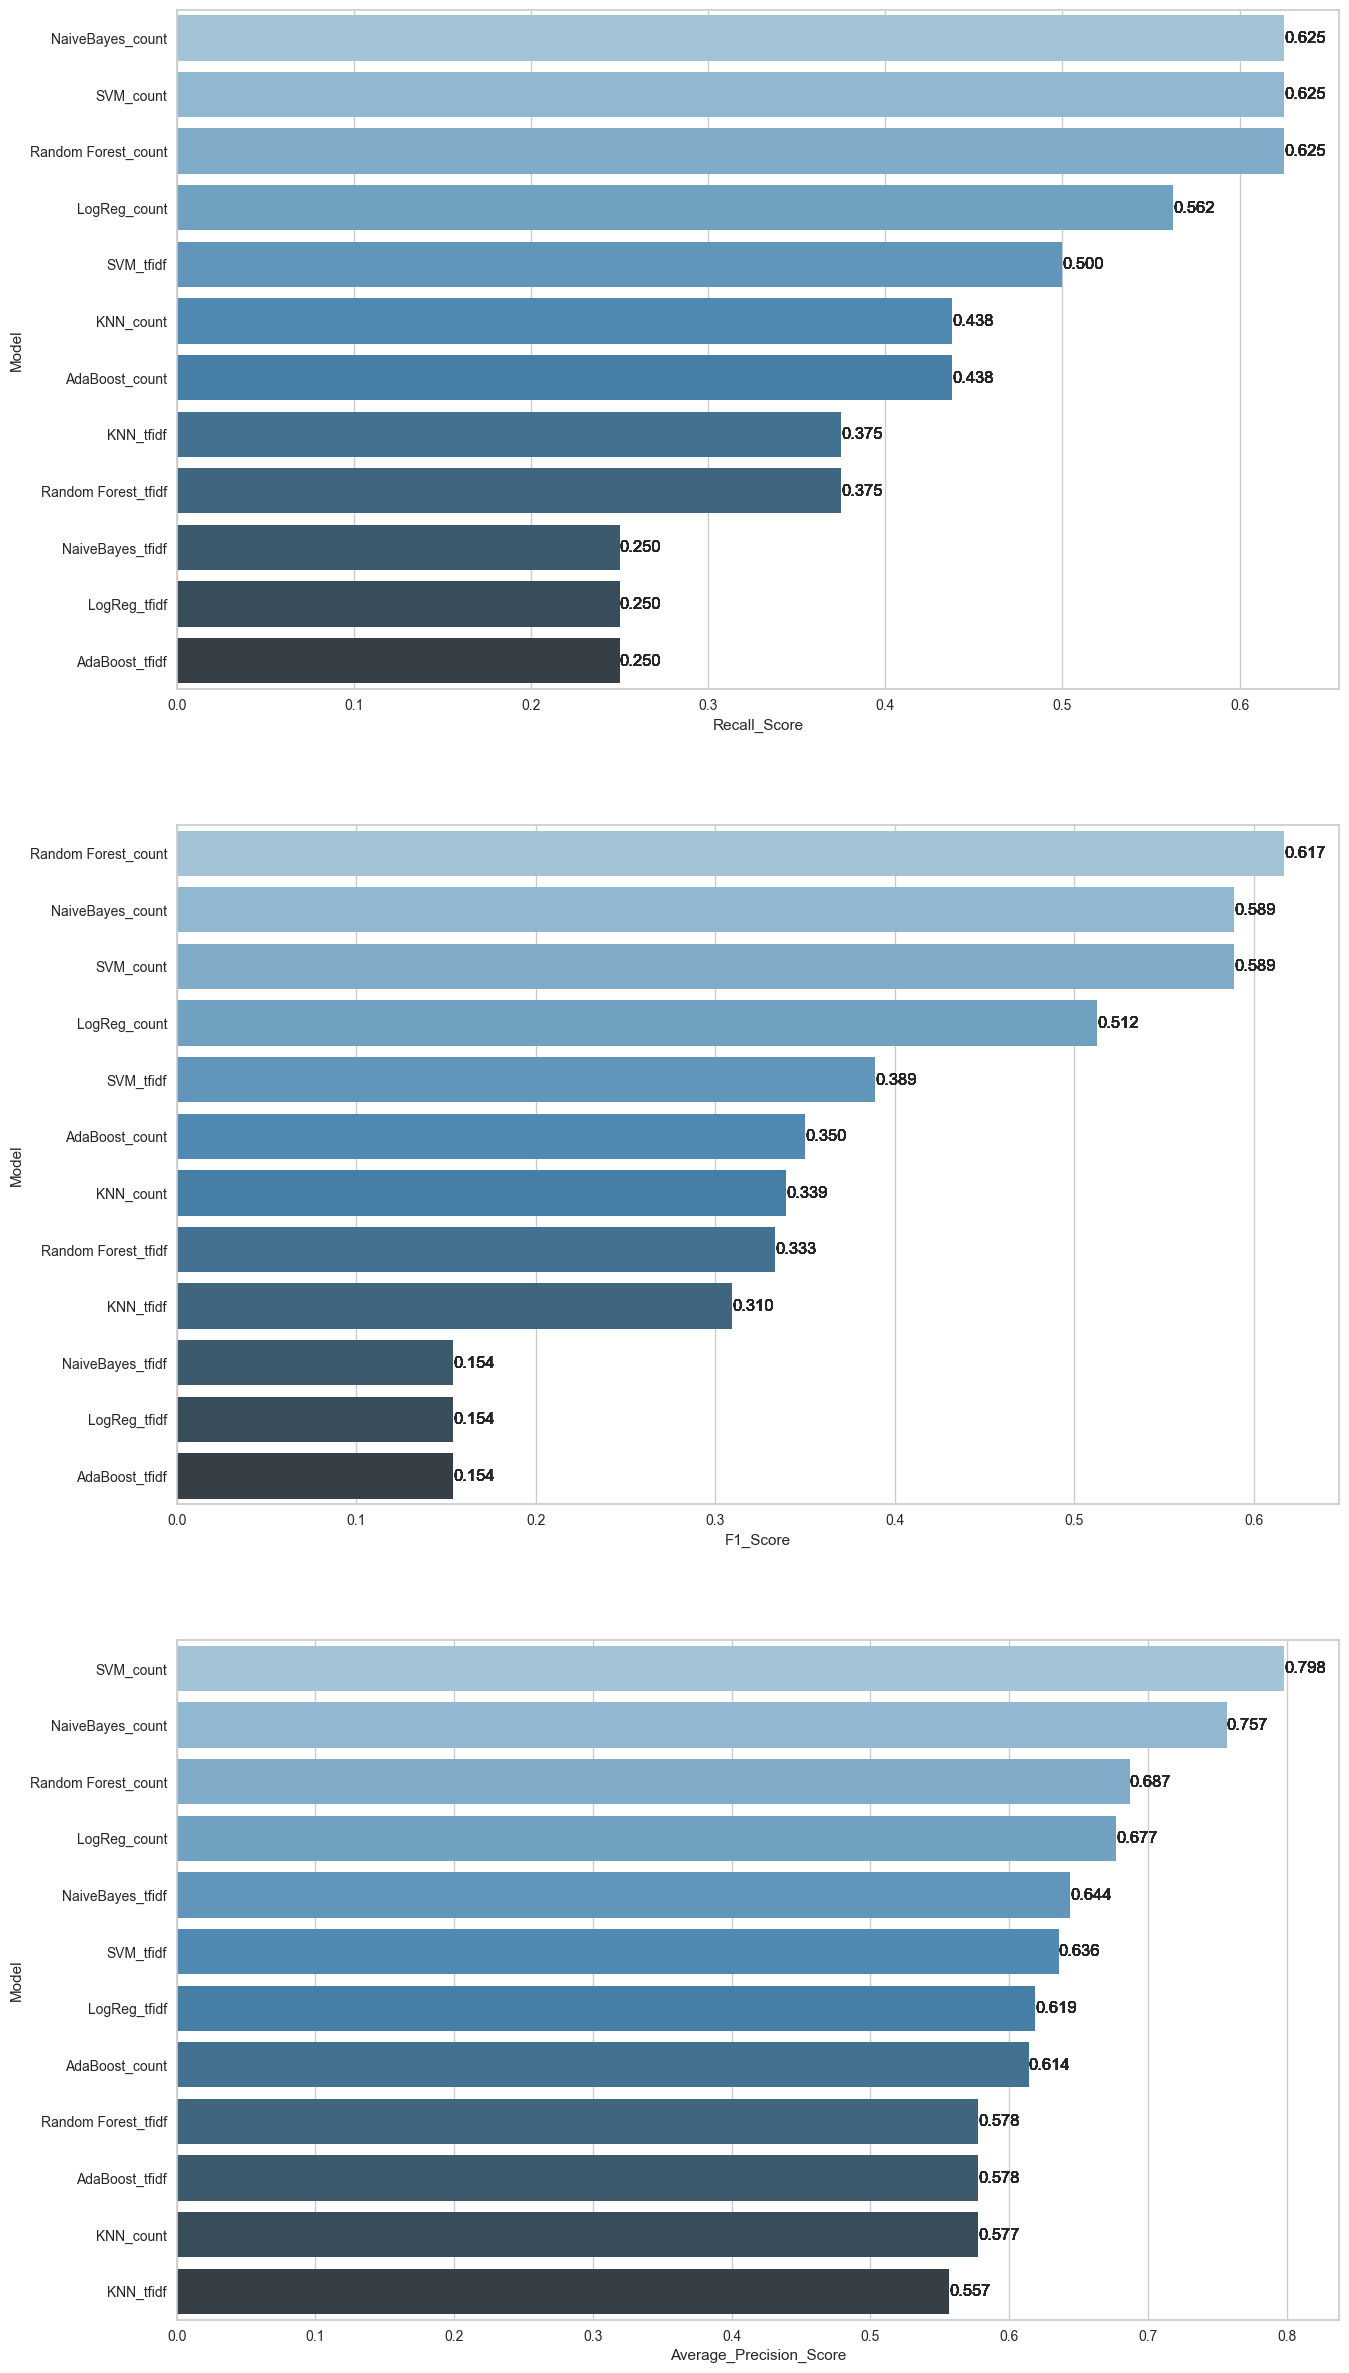

In [301]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "KNN_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", "KNN_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, knn_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, knn_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                  knn_count_rec, rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  knn_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec],
                        
                        "Average_Precision_Score": [nb_AP, log_AP, svc_AP, knn_AP, rf_AP,
                                                          ada_AP, nb_tfidf_AP, log_tfidf_AP, svc_tfidf_AP,
                                                           knn_tfidf_AP, rf_tfidf_AP, ada_tfidf_AP]})

def labels(ax):
                        
    for p in ax.patches:
        ax.bar_label(ax.containers[0],fmt="%.3f")
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

## Best Model and Predictions


In [302]:
from sklearn.pipeline import Pipeline

In [303]:
pipe = Pipeline([('cv',CountVectorizer (preprocessor=cleaning, min_df=3)),('svm',LinearSVC (C=0.001, class_weight="balanced"))])

In [304]:
pipe.fit(X, y)

Pipeline(steps=[('cv',
                 CountVectorizer(min_df=3,
                                 preprocessor=<function cleaning at 0x0000015ED7B37160>)),
                ('svm', LinearSVC(C=0.001, class_weight='balanced'))])

In [308]:
example = X_test.iloc[3]
example = pd.Series(example)

In [309]:
print("Predicted Sub Category =", pipe.predict(example))
print("Actual Sub Category    =", y_test.iloc[3])

Predicted Sub Category = ['election']
Actual Sub Category    = election


In [310]:
X_test.iloc[3]

'libya hold election december participant libyan political dialogue forum lpdf tunisia yesterday agreed hold constitutionally based election december news confirmed virtual press conference acting unsmil head stephanie williams yesterday said full pleased announce today participant libyan political dialogue forum agreed date national election libya december december libyan independence day symbolic day important day libyan also critical day history libya time occasion democratically elect leader renew legitimacy institution course work seek full enfranchisement including ability displaced home able vote ensure necessary security condition also full enabling high national election commission national body charged conducting election preliminary agreement roadmap preparatory phase reached previously indicated presser gave wednesday participant reached preliminary agreement roadmap preparatory phase towards national election roadmap reflects libyan people expressed diverse representation 